In [1]:
import matplotlib.pyplot as plt
import numpy as np
from data_loader import load_data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm

Perceptron functions

In [7]:
def initialisation(x) :
    w = np.random.randn(x.shape[1],1)
    b = np.random.randn(1)
    return w,b
def model(x,w,b):
    z = x.dot(w) + b
    a = 1 / (1 + np.exp(-z))
    return a
def log_loss(A,y):
    e = 1e-15
    return -1 / y.shape[0] * np.sum((y*np.log(A + e)) + (1-y)*np.log(1-A + e))
def gradients(A,x,y):
    dW = 1/y.shape[0] * np.dot(x.T,A-y)
    db = 1/y.shape[0] * np.sum(A-y)
    return dW,db
def update(w,b,dw,db,learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w,b
def predict(x,w,b):
    A = model(x,w,b)
    return A >= 0.5
def perceptron(x_train,y_train,x_test,y_test,learning_rate = 0.1 , n_iter = 100):
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    W,b = initialisation(x_train)
    for i in tqdm(range(n_iter)):
        A = model(x_train,W,b)

        if not(i % 10) :

            #Train
            loss_train = log_loss(A,y_train)
            y_train_pred = predict(x_train,W,b)
            train_loss.append(loss_train)
            train_acc.append(accuracy_score(y_train,y_train_pred))

            #Test
            A_test = model(x_test,W,b)
            loss_test =  log_loss(A_test,y_test)
            test_loss.append(loss_test)
            y_test_pred = predict(x_test,W,b)
            test_acc.append(accuracy_score(y_test,y_test_pred))


        dW , db = gradients(A,x_train,y_train)
        W,b = update(W,b,dW,db,learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss,label="Train loss")
    plt.plot(test_loss,label="Test loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc,label="Train accuracy")
    plt.plot(test_acc,label="Test accuracy")
    plt.legend()
    return W,b

Data loading

In [4]:
x_train,y_train,x_test,y_test = load_data()
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (1000, 64, 64)
y_train shape:  (1000, 1)
x_test shape:  (200, 64, 64)
y_test shape:  (200, 1)


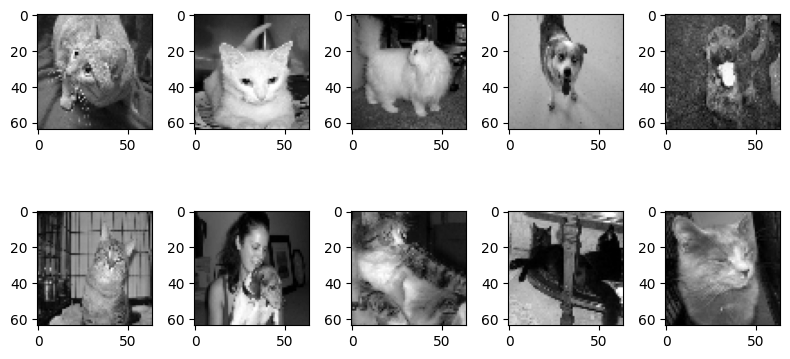

In [25]:
plt.figure(figsize=(8,8))
for i in range(1,11):
    plt.subplot(4,5,i)
    plt.imshow(x_train[i],cmap='gray')
    plt.tight_layout()

In [5]:
def preprocessing(x_train,x_test):
    minmax = MinMaxScaler()
    x_train = np.array([elt.flatten() for elt in x_train])
    x_test = np.array([elt.flatten() for elt in x_test])
    x_train = minmax.fit_transform(x_train)
    x_test = minmax.transform(x_test)
    return x_train , x_test

x_train , x_test = preprocessing(x_train , x_test)

First visualisation

=> We can conclude that the default learning rate value is too big

0.508


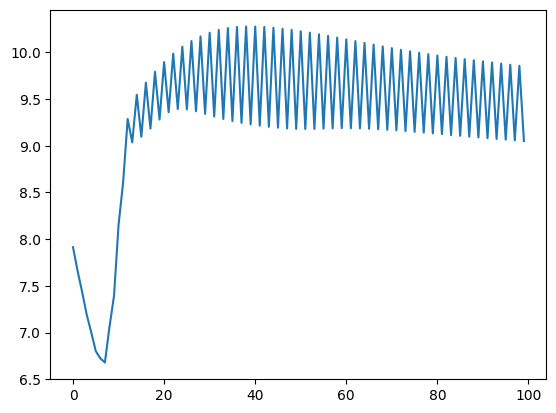

In [58]:
W,b = perceptron(x_train,y_train)

Updated learning rate and n_iterations

100%|██████████| 10000/10000 [00:36<00:00, 270.69it/s]


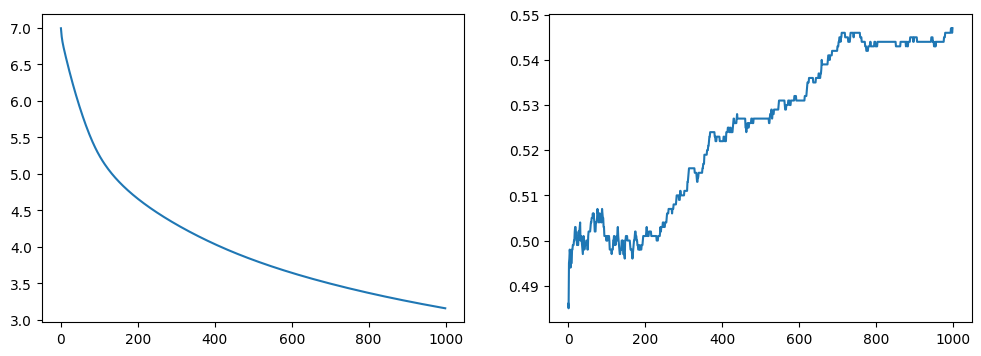

In [91]:
W,b = perceptron(x_train,y_train,0.001,10000)

Train and Test visualisations (updating perceptron function)

100%|██████████| 10000/10000 [00:40<00:00, 249.57it/s]


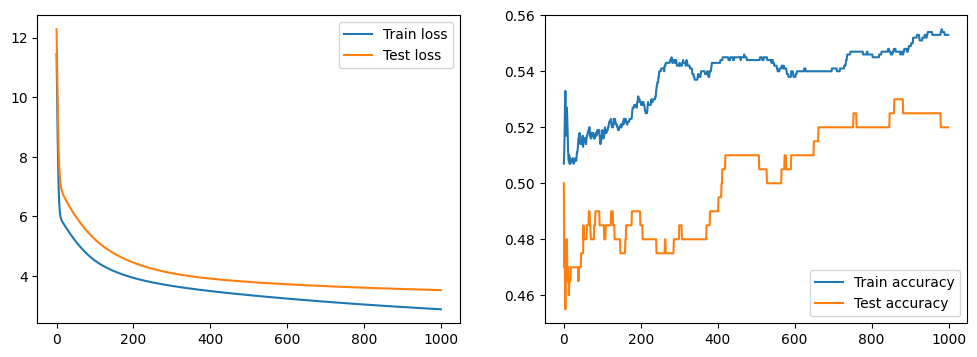

In [8]:
W,b = perceptron(x_train,y_train,x_test,y_test,0.001,10000)